In [312]:
from importlib import reload
import data_loader as dl
import naive_bayes as nb
import evaluator as eval

You can reload the data_loader.py without restarting the kernel using `reload(data_loader)`

In [313]:
reload(dl)
reload(nb)
reload(eval)

<module 'evaluator' from 'D:\\College\\Level 4\\Fall Semester\\CSE 472 - Data Mining (NLP)\\Labs\\nlp-assignment1\\src\\evaluator.py'>

# Part 0: Data loading and Preprocessing

In [314]:
data_loader = dl.DataLoader()  # using the default file paths and columns to select.
data_loader.load_preprocess_data()
data_loader.describe_data()

+----------------------+-------------+----------------+-------------------------+---------------------------+
| DataFrame            |   # of Rows |   # of Columns | Column Names            | Label Statistics          |
+======================+=============+================+=========================+===========================+
| Training Dataframe   |        8544 |              3 | sentence, label, tokens | label                     |
|                      |             |                |                         | 3    2322                 |
|                      |             |                |                         | 1    2218                 |
|                      |             |                |                         | 2    1624                 |
|                      |             |                |                         | 4    1288                 |
|                      |             |                |                         | 0    1092                 |
|         

Use `data_loader.get_data()` to get the 3 dataframes

In [315]:
train_df, test_df, validation_df = data_loader.get_data()

# Part 1: Naive Bayes

In [316]:
naive_bayes = nb.NaiveBayes(train_df, test_df)
naive_bayes.train()
y_hat = naive_bayes.predict_all()

Finished preprocessing corpus vocabulary .. found 18280 word type.
Computing big doc .. 12.78% completed
Computing big doc .. 38.74% completed
Computing big doc .. 57.75% completed
Computing big doc .. 84.93% completed
Computing big doc .. 100.00% completed
Training model .. 12.78% completed.
Training model .. 38.74% completed.
Training model .. 57.75% completed.
Training model .. 84.93% completed.
Training model .. 100.00% completed.
Model accuracy: 39.68%


# Part 2: Logistic Regression

# Part 3: Evaluation

In [317]:
evaluator = eval.Evaluator(test_df['label'], y_hat)

In [318]:
evaluator.compute_macro_metrics()

+---------------+-------------+----------+------------+
| Class         |   Precision |   Recall |   F1-Score |
+===============+=============+==========+============+
| Class 0       |      0.3404 |   0.0573 |     0.0982 |
+---------------+-------------+----------+------------+
| Class 1       |      0.449  |   0.6461 |     0.5298 |
+---------------+-------------+----------+------------+
| Class 2       |      0.252  |   0.0823 |     0.124  |
+---------------+-------------+----------+------------+
| Class 3       |      0.3507 |   0.698  |     0.4669 |
+---------------+-------------+----------+------------+
| Class 4       |      0.5818 |   0.1604 |     0.2515 |
+---------------+-------------+----------+------------+
| Macro Average |      0.3948 |   0.3288 |     0.2941 |
+---------------+-------------+----------+------------+


In [319]:
evaluator.compute_micro_metrics()

+-----------------+---------+
| Micro Metrics   |   Value |
+=================+=========+
| Precision       |  0.3968 |
+-----------------+---------+
| Recall          |  0.3968 |
+-----------------+---------+
| F1 Score        |  0.3968 |
+-----------------+---------+


Note that the micro metrics (precision, recall and f1-score) are all equal. This is due to the fact of pooling the classes confusions matrices into a single confusion matrix which will result in a symmetric matrix by definition. Consequently, the precision and recall will always have the same score and finally based on the definition of the f1-score, it will also be equal to the precision.

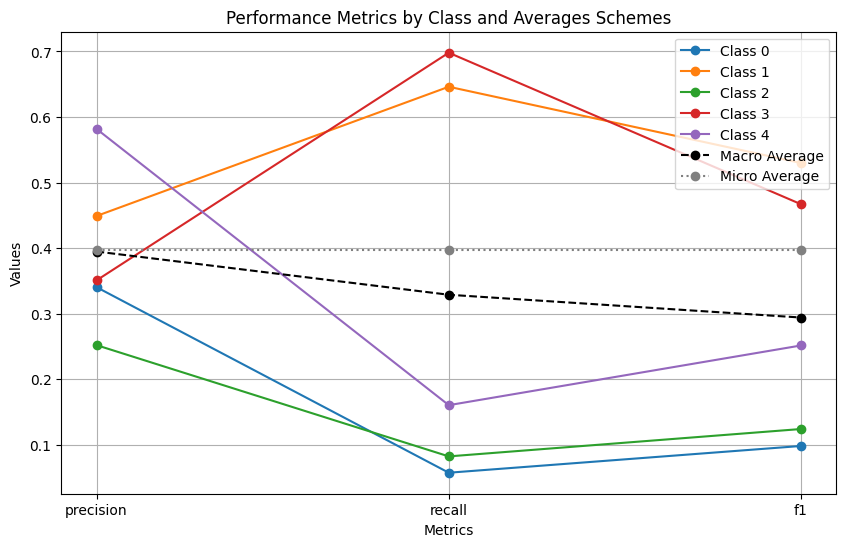

In [320]:
evaluator.plot_results()